# 决策树
决策树（decision tree）是一个树结构（可以是二叉树或非二叉树）。其每个非叶节点表示一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，而每个叶节点存放一个类别。使用决策树进行决策的过程就是从根节点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。

## 构建决策树
**构造决策树的关键步骤是分裂属性**。所谓分裂属性就是在某个节点处按照某一特征属性的不同划分构造不同的分支，其目标是让各个分裂子集尽可能地“纯”。分裂属性分为三种不同的情况：

+ 属性是离散值且不要求生成二叉决策树。此时用属性的每一个划分作为一个分支。
+ 属性是离散值且要求生成二叉决策树。此时使用属性划分的一个子集进行测试，按照“属于此子集”和“不属于此子集”分成两个分支。
+ 属性是连续值。此时确定一个值作为分裂点split_point，按照>split_point和<=split_point生成两个分支。

构造决策树的关键性内容是进行**属性选择度量**，属性选择度量是一种选择分裂准则，是将给定的类标记的训练集合的数据划分D“最好”地分成个体类的启发式方法，常见算法有ID3,C4.5。

## ID3
算法的核心思想就是以信息增益度量属性选择，选择分裂后信息增益最大的属性进行分裂。

下面使用一个SNS社区中不真实账号检测的例子来说明决策树的构造，训练集如下（其中s,m,l分别表示小，中，大）：
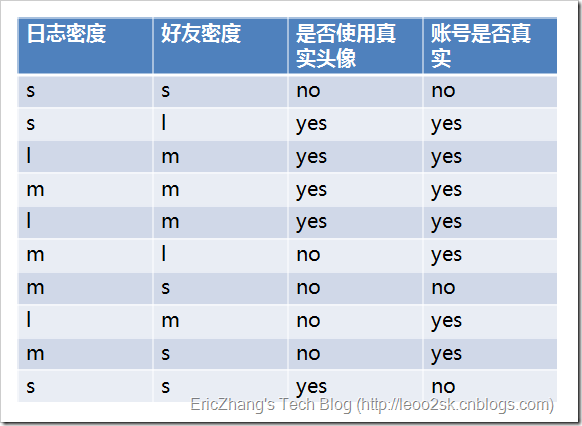

用L，F，H分别表示日志密度，好友密度，是否使用真实头像等3个属性。


### 信息增益计算

+ 计算分类类别对训练集划分的熵$D$：$info(D) = - \sum_{i=1}^{m}p_ilog_2(p_i)$，其中$p_i$表示第i个类别在训练集中出现的概率（实际计算可用频率替代），对于例子的计算方式如下：

$info(D) = -0.7log_20.7 - 0.3 log_20.3 = 0.879$

+ 计算属性$A$对$D$划分的期望信息：$info_A(D) = \sum_{j=1}^v \dfrac{|D_j|}{|D|}info(D_j)$，其中$j$代表属性$A$的某一类取值，对于例子的计算方式如下：

$info_L(D)=\dfrac{3}{10}\times(-\dfrac{1}{3}log_2\dfrac{1}{3} - \dfrac{2}{3}log_2\dfrac{2}{3}) + \dfrac{4}{10}\times(-\dfrac{1}{4}log_2\dfrac{1}{4}-\dfrac{3}{4}log_2\dfrac{3}{4}) + \dfrac{3}{10}\times(-\dfrac{0}{3}log_2\dfrac{0}{3}-\dfrac{3}{3}log_2\dfrac{3}{3})=0.603$

+ 计算信息增益：$gain(L) = 0.879 - 0.603=0.276$，因此选择日志密度的属性增益为0.276。

用同样方法得到H和F的信息增益分别为0.033和0.553。因为F具有最大的信息增益，所以第一次分裂选择F为分裂属性，分类结果如下：

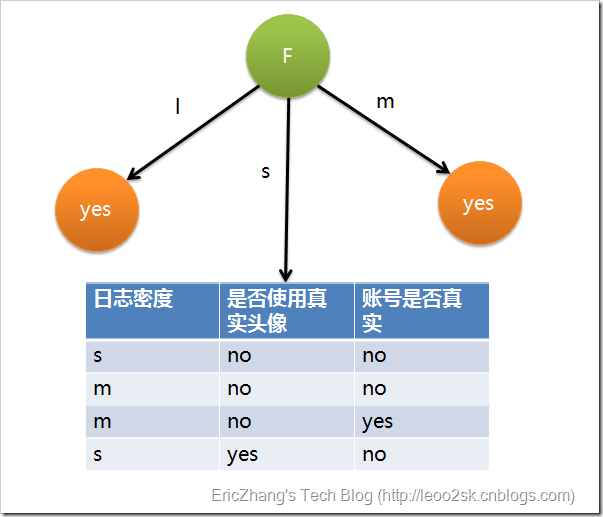

在上图的基础上，再递归使用这个方法计算子节点的分裂属性，最终就可以得到整个决策树。

## 参考资料

> [分类算法--决策树(Decision tree)](http://lib.csdn.net/article/machinelearning/39666)